In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pathlib import Path
import pickle

from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder

from sklearn import set_config; set_config(display='diagram')

from detect_ai_content.params import *

# from detect_ai_content.ml_logic.for_texts.using_ml_features.TrueNetTextLogisticRegression import TrueNetTextLogisticRegression
# from detect_ai_content.ml_logic.for_texts.using_ml_features.TrueNetTextTfidfNaiveBayesClassifier import TrueNetTextTfidfNaiveBayesClassifier
# from detect_ai_content.ml_logic.for_texts.using_ml_features.TrueNetTextDecisionTreeClassifier import TrueNetTextDecisionTreeClassifier
# from detect_ai_content.ml_logic.for_texts.using_ml_features.TrueNetTextSVC import TrueNetTextSVC
# from detect_ai_content.ml_logic.for_texts.using_ml_features.TrueNetTextKNeighborsClassifier import TrueNetTextKNeighborsClassifier
# from detect_ai_content.ml_logic.for_texts.using_ml_features.TrueNetTextUsingBERTMaskedPredictions import TrueNetTextUsingBERTMaskedPredictions

from detect_ai_content.ml_logic.preprocess import preprocess
from detect_ai_content.ml_logic.data import get_enriched_df

from detect_ai_content.ml_logic.for_texts.XGB import XGB

[nltk_data] Downloading package punkt_tab to /home/yuka/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /home/yuka/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /home/yuka/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to /home/yuka/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
/home/yuka/.pyenv/versions/detect_ai_content/lib/python3.10/site-packages/torch/cuda/__init__.py:129: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 11040). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at ../c10/cuda/CUDAFunctions.

torch.cuda.is_available:False


2024-11-14 15:47:11.454063: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-14 15:47:11.467918: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1731595631.485297   46336 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1731595631.490226   46336 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-14 15:47:11.510344: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

device:cpu


2024-11-14 15:47:26.758540: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


tf.config.experimental.list_physical_devices(GPU):[]


/home/yuka/.pyenv/versions/detect_ai_content/lib/python3.10/site-packages/torch/cuda/__init__.py:716: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
[nltk_data] Downloading package punkt to /home/yuka/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /home/yuka/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
df = get_enriched_df(purpose="test")
df=df.head(5)
y_test = df['generated']
# X_test_processed = preprocess(data=df, auto_enrich=False)

# TrueNetTextTfidfNaiveBayesClassifier_model = TrueNetTextTfidfNaiveBayesClassifier()._load_model(stage="Staging")
# TrueNetTextLogisticRegression_model = TrueNetTextLogisticRegression()._load_model(stage="staging")
# TrueNetTextDecisionTreeClassifier_model = TrueNetTextDecisionTreeClassifier()._load_model(stage="staging")
# TrueNetTextKNeighborsClassifier_model = TrueNetTextKNeighborsClassifier()._load_model(stage="staging")
# TrueNetTextSVC_model = TrueNetTextSVC()._load_model(stage="staging")
# TrueNetTextUsingBERTMaskedPredictions_model = TrueNetTextUsingBERTMaskedPredictions()._load_model(stage="staging")


In [3]:
xgb = XGB()
model = xgb.load_model()

In [4]:
dfs = xgb.get_internal_features(text=df)
dfs

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


(5, 43)


,stopwords_ratio,punctuation_ratio,repetition_ratio,dependency_ratio,spelling_errors_ratio,pos__ratio,avg_word_length,lexical_diversity,flesch_reading_ease,smog_index,flesch_kincaid_grade,sentiment
0,0.513089,0.094241,0.091623,0.150000,0.094241,1.002618,3.829843,0.413613,80.31,8.0,6.1,-1
1,0.398773,0.119632,0.049080,0.166667,0.110429,1.006135,4.457055,0.493865,41.70,15.3,12.7,1
2,0.433898,0.098305,0.081356,1.100000,0.091525,1.010169,4.600000,0.498305,46.81,14.7,12.8,-1
3,0.408759,0.131387,0.083942,0.272727,0.131387,1.000000,4.062044,0.427007,85.59,6.9,4.1,-1
4,0.489971,0.054441,0.143266,0.939394,0.047278,0.988539,4.255014,0.282235,68.10,11.3,8.7,-1


In [6]:
xgb_preds = model.predict(dfs)
xgb_preds
# TrueNetTextLogisticRegression_preds = TrueNetTextLogisticRegression_model.predict(X_test_processed)
# TrueNetTextDecisionTreeClassifier_preds = TrueNetTextDecisionTreeClassifier_model.predict(X_test_processed)
# TrueNetTextKNeighborsClassifier_preds = TrueNetTextKNeighborsClassifier_model.predict(X_test_processed)
# TrueNetTextSVC_preds = TrueNetTextSVC_model.predict(X_test_processed)
# TrueNetTextTfidfNaiveBayesClassifier_preds = TrueNetTextTfidfNaiveBayesClassifier_model.predict(df['text'])

# X_BERT_processed = TrueNetTextUsingBERTMaskedPredictions.preprocess(data=df)
# TrueNetTextUsingBERTMaskedPredictions_preds = TrueNetTextUsingBERTMaskedPredictions_model.predict(X_BERT_processed)


array([0, 1, 1, 0, 0])

In [8]:
xgb_preds_proba = model.predict_proba(dfs)
xgb_preds_proba

array([[9.9222422e-01, 7.7757854e-03],
       [6.3657761e-05, 9.9993634e-01],
       [2.4437904e-05, 9.9997556e-01],
       [9.8029590e-01, 1.9704077e-02],
       [9.9951053e-01, 4.8947602e-04]], dtype=float32)

# class 0 is on left  
# class 1 is on the right 

In [9]:
predictions_df = pd.DataFrame(data={
    # 'LogisticRegression':TrueNetTextLogisticRegression_preds,
    # 'DecisionTreeClassifier':TrueNetTextDecisionTreeClassifier_preds,
    # 'KNeighborsClassifier':TrueNetTextKNeighborsClassifier_preds,
    # 'SVC':TrueNetTextSVC_preds,
    # 'BERTMaskedPredictions':TrueNetTextUsingBERTMaskedPredictions_preds,
    # 'TfidfNaiveBayesClassifier': TrueNetTextTfidfNaiveBayesClassifier_preds,
    'XGB':xgb_preds,
    'y_test':y_test
})
predictions_df.head(2)

,XGB,y_test
0,0,0.0
1,1,1.0


In [10]:
predictions_df

,XGB,y_test
0,0,0.0
1,1,1.0
2,1,1.0
3,0,0.0
4,0,0.0


In [7]:
predictions_df['LogisticRegression_diff'] = predictions_df['LogisticRegression'] - predictions_df['y_test']
predictions_df['DecisionTreeClassifier_diff'] = predictions_df['DecisionTreeClassifier'] - predictions_df['y_test']
predictions_df['KNeighborsClassifier_diff'] = predictions_df['KNeighborsClassifier'] - predictions_df['y_test']
predictions_df['SVC_diff'] = predictions_df['SVC'] - predictions_df['y_test']
predictions_df['BERTMaskedPredictions_diff'] = predictions_df['BERTMaskedPredictions'] - predictions_df['y_test']
predictions_df['TfidfNaiveBayesClassifier_diff'] = predictions_df['TfidfNaiveBayesClassifier'] - predictions_df['y_test']

In [15]:
predictions_df['sum_diff'] = abs(predictions_df['LogisticRegression_diff']) + abs(predictions_df['DecisionTreeClassifier_diff']) + abs(predictions_df['KNeighborsClassifier_diff']) + abs(predictions_df['SVC_diff']) + abs(predictions_df['BERTMaskedPredictions_diff']) + abs(predictions_df['TfidfNaiveBayesClassifier_diff'])

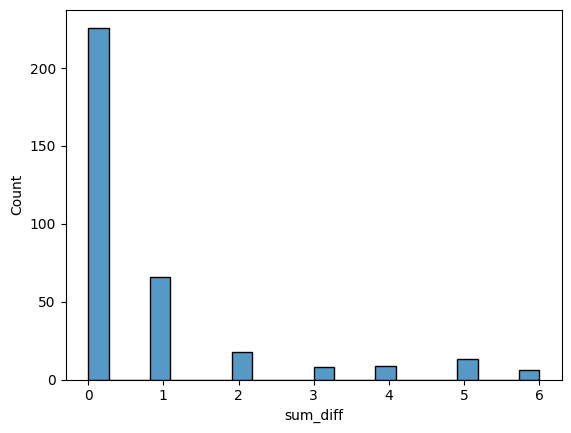

In [22]:
sns.histplot(data=predictions_df, x='sum_diff');

In [17]:
sum(predictions_df['sum_diff'] < 2) / predictions_df.shape[0]

0.8439306358381503

In [20]:
predictions_df[predictions_df['sum_diff'] > 2][['LogisticRegression', 'DecisionTreeClassifier', 'KNeighborsClassifier', 'SVC','BERTMaskedPredictions','TfidfNaiveBayesClassifier', 'y_test', 'sum_diff']].sort_values(by=['sum_diff'], ascending=False)

,LogisticRegression,DecisionTreeClassifier,KNeighborsClassifier,SVC,BERTMaskedPredictions,TfidfNaiveBayesClassifier,y_test,sum_diff
275,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0
229,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0
66,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0
213,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0
118,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0
192,1.0,1.0,1.0,1.0,1.0,1.0,0.0,6.0
149,1.0,1.0,1.0,1.0,1.0,0.0,0.0,5.0
132,1.0,1.0,1.0,1.0,1.0,0.0,0.0,5.0
294,1.0,1.0,1.0,1.0,1.0,0.0,0.0,5.0
282,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0
